In [52]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
his_servicios_path = '/media/cristian/Alpha/3_PROYECTOS/HACKATONS/TAXIS LIBRES/his_servicios.csv'
his_servicios_df = pd.read_csv(his_servicios_path)
his_servicios_df

/home/cristian/Documents/predyctiva/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (11,16,23,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,AGENTE,AUTOMOVILASIGNADO_ID,CADUCIDADASIGNACIONSERVICIO,CALIFICACIONCONDUCTORASIGNADO,CALIFICACION_USUARIO,CONDUCTORASIGNADO_ID,COSTO,DELTACADUCIDADASIGNACION,DIRECCIONCOMPLEMENTARIA,...,TIPOASIGNACION,TIPOSERVICIO,USUARIO,USUARIOTELEFONICO_ID,IDCONDUCTORASIGNADO,PAGOEXITOSO,MOTIVORECHAZO,DIRECCIONMOSTRAR,DESCPAGO,BARRIOORIGEN
0,45691435,NaN,NaN,180,NaN,NaN,NaN,16500.0,60,NaN,...,TIEMPO_RUTA,NORMAL,8272274.0,NaN,NaN,NaN,NaN,kr 30 # 30 sur - impar,NaN,SAN JORGE CENTRAL
1,45691436,NaN,NaN,90,NaN,NaN,NaN,NaN,32,LOS ANDES,...,TIEMPO_RUTA,NORMAL,4418953.0,4418953.0,NaN,NaN,NaN,cl 59 c # 2 - impar,NaN,LOS ANDES B - LA RIVIERA
2,45691437,NaN,NaN,180,NaN,NaN,NaN,NaN,60,NaN,...,TIEMPO_RUTA,NORMAL,9030055.0,NaN,NaN,NaN,USU|AppUsuario|Antes de asignacion,cl 69 sur # 20 d - par,NaN,JUAN JOSE RONDON
3,45691438,NaN,NaN,180,NaN,NaN,NaN,18100.0,60,NaN,...,TIEMPO_RUTA,NORMAL,9194488.0,NaN,NaN,NaN,USU|AppUsuario|Ya no necesito el Taxi,cl 18 # 99 - par,NaN,CENTRO FONTIBON
4,45691439,NaN,NaN,180,NaN,NaN,NaN,7500.0,60,NaN,...,TIEMPO_RUTA,NORMAL,9279492.0,NaN,NaN,NaN,USU|AppUsuario|Antes de asignacion,cl 57 j sur # 77 j - impar,NaN,LA UNIDAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463851,49155288,NaN,162520.0,90,NaN,NaN,149407719109191076555,18000.0,60,CALENDULA,...,TIEMPO_DISTANCIA,NORMAL,1249428.0,1249428.0,149407719109191076555,NaN,NaN,NaN,Pago definido/preliquidado por 18000,CEDRO NARVAEZ
3463852,49155289,NaN,NaN,180,NaN,NaN,NaN,18600.0,60,NaN,...,TIEMPO_DISTANCIA,NORMAL,9547561.0,NaN,NaN,NaN,NaN,NaN,NaN,EL CAMPIN
3463853,49155290,NaN,NaN,180,NaN,NaN,NaN,13900.0,32,NaN,...,TIEMPO_DISTANCIA,NORMAL,9413564.0,NaN,NaN,NaN,NaN,NaN,NaN,CHIPICHAPE
3463854,49155291,NaN,NaN,180,NaN,NaN,NaN,NaN,60,NaN,...,TIEMPO_DISTANCIA,NORMAL,8891600.0,NaN,NaN,NaN,NaN,NaN,NaN,SAN PATRICIO


In [3]:
list(his_servicios_df.columns)

['ID',
 'AGENTE',
 'AUTOMOVILASIGNADO_ID',
 'CADUCIDADASIGNACIONSERVICIO',
 'CALIFICACIONCONDUCTORASIGNADO',
 'CALIFICACION_USUARIO',
 'CONDUCTORASIGNADO_ID',
 'COSTO',
 'DELTACADUCIDADASIGNACION',
 'DIRECCIONCOMPLEMENTARIA',
 'DIRECCIONDESTINO',
 'DIRECCIONPRINCIPAL',
 'ESTADO',
 'FECHA',
 'FECHALEGIBLE',
 'IDCIUDAD',
 'IDLLAMADA',
 'INDICACIONES',
 'LATITUD',
 'LATITUDDESTINO',
 'LONGITUD',
 'LONGITUDDESTINO',
 'MEDIOPAGO',
 'NUMEROVALE',
 'ORIGEN',
 'PLACAAUTOMOVILASIGNADO',
 'PROMEDIOCONDUCTORASIGNADO',
 'PROPINA',
 'TAMANOVEHICULO',
 'TIPOASIGNACION',
 'TIPOSERVICIO',
 'USUARIO',
 'USUARIOTELEFONICO_ID',
 'IDCONDUCTORASIGNADO',
 'PAGOEXITOSO',
 'MOTIVORECHAZO',
 'DIRECCIONMOSTRAR',
 'DESCPAGO',
 'BARRIOORIGEN']

In [74]:
his_servicios_df.iloc[1000000]

ID                                                           46691437
AGENTE                                                            NaN
AUTOMOVILASIGNADO_ID                                         143355.0
CADUCIDADASIGNACIONSERVICIO                                       180
CALIFICACIONCONDUCTORASIGNADO                                     5.0
CALIFICACION_USUARIO                                              NaN
CONDUCTORASIGNADO_ID                            149556581100171194559
COSTO                                                         17500.0
DELTACADUCIDADASIGNACION                                           60
DIRECCIONCOMPLEMENTARIA                                           NaN
DIRECCIONDESTINO                             CL 149 # KR 54A (BOGOTA)
DIRECCIONPRINCIPAL                                                NaN
ESTADO                                                       CUMPLIDO
FECHA                                                   1612749261748
FECHALEGIBLE        

In [30]:
his_servicios_df.IDCIUDAD.unique()

array([11001, 76001, 25754,  5001,  5631, 17001, 68001, 54001, 68276,
       76364,  8001,  5088, 47001,  5360, 76520, 68547, 25175, 68307,
        5380, 13001,  5266, 76892, 76130, 68406, 76563,    55, 76275,
        5615])

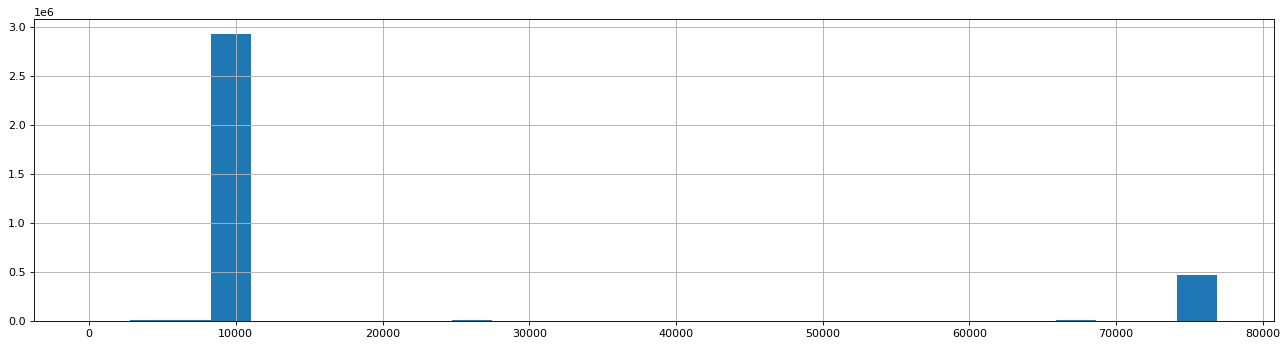

In [59]:

figure(figsize=(20, 5), dpi=80)
hist = his_servicios_df.IDCIUDAD.hist(bins=len(list(his_servicios_df.IDCIUDAD.unique())))

In [31]:
his_servicios_df.ESTADO.unique()

array(['ABANDONADO', 'CANCELADO', 'CUMPLIDO', 'ABORDOCONFIRMADO',
       'CONFIRMADO', 'FINALIZADO', 'PRELIQUIDADO', 'NUEVO', 'RECHAZADO',
       'ALFRENTE', 'NEGADO', 'ASIGNADO'], dtype=object)

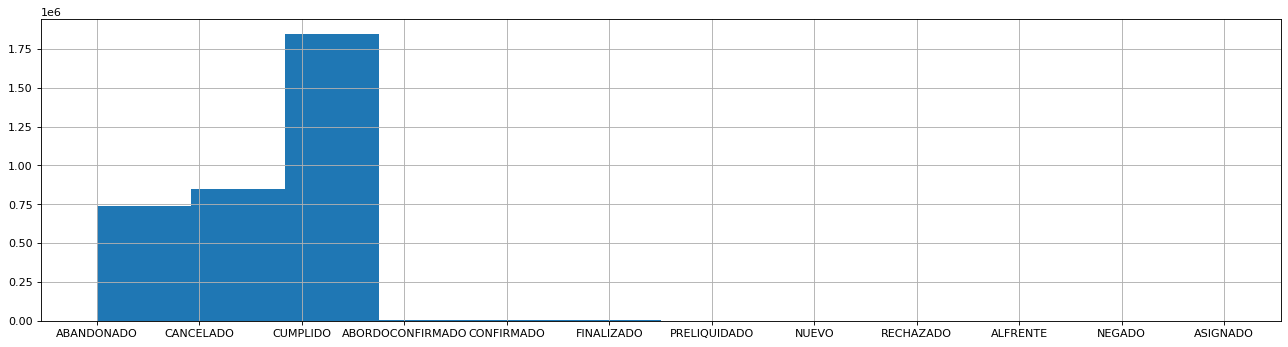

In [58]:

figure(figsize=(20, 5), dpi=80)
hist = his_servicios_df.ESTADO.hist(bins=len(list(his_servicios_df.ESTADO.unique())))

In [32]:
his_servicios_df.ORIGEN.unique()

array(['APP', 'IVR', 'RECEPCION', 'CALLE', 'TABLETS', 'I.V.R.',
       'CHAT_BOT', 'TELEGRAMTD', 'WEB', 'SATELITE', 'RED AMARILLA',
       'TELEGRAM BOT', 'PISTAS', 'Reserva', 'CHAT_BOT_689',
       'CHAT_BOT_659', 'CHAT_BOT_803', 'CHAT_BOT_729', 'CHAT_BOT_'],
      dtype=object)

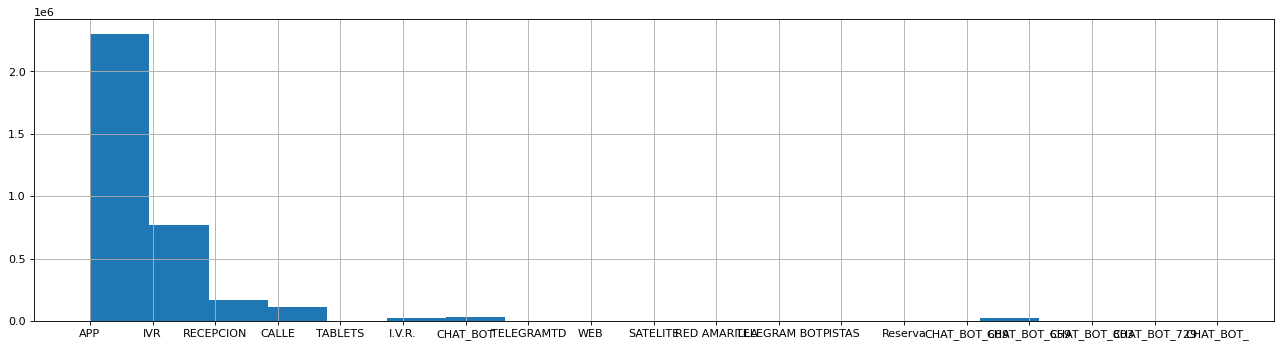

In [60]:
figure(figsize=(20, 5), dpi=80)
hist = his_servicios_df.ORIGEN.hist(bins=len(list(his_servicios_df.ORIGEN.unique())))

In [33]:
his_servicios_df.MEDIOPAGO.unique()

array(['EFECTIVO', 'TARJETA', 'VALE', 'Efectivo / Vale'], dtype=object)

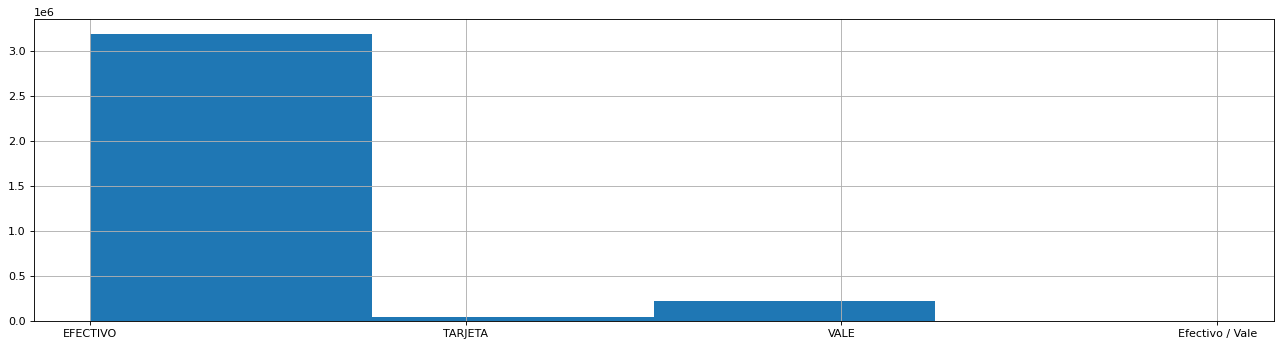

In [61]:
figure(figsize=(20, 5), dpi=80)
hist = his_servicios_df.MEDIOPAGO.hist(bins=len(list(his_servicios_df.MEDIOPAGO.unique())))

In [45]:
his_servicios_df.TIPOSERVICIO.unique()

array(['NORMAL', nan, 'PREMIUM', 'LUJO', 'BASICO', '1952', '2101'],
      dtype=object)

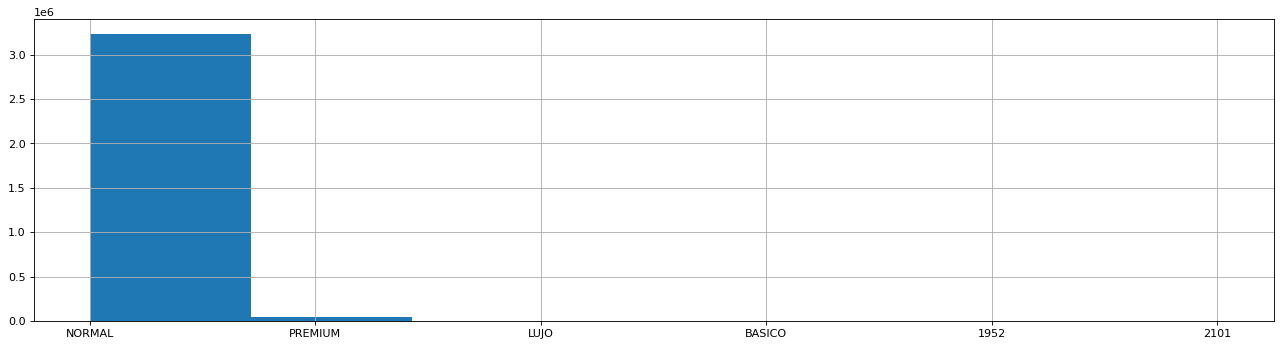

In [62]:
figure(figsize=(20, 5), dpi=80)
hist = his_servicios_df.TIPOSERVICIO.hist(bins=len(list(his_servicios_df.TIPOSERVICIO.unique())))

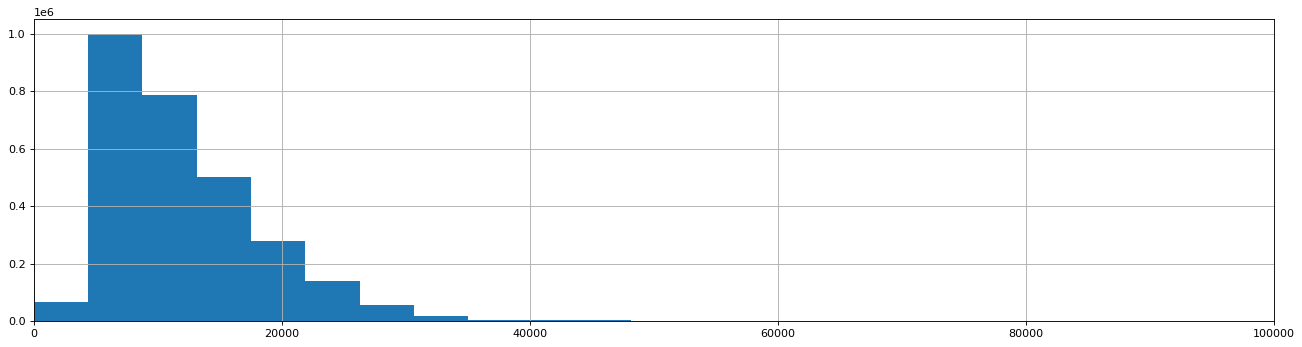

In [85]:
figure(figsize=(20, 5), dpi=80)
hist = his_servicios_df.COSTO.hist(bins=3000).set_xlim((0,100000))

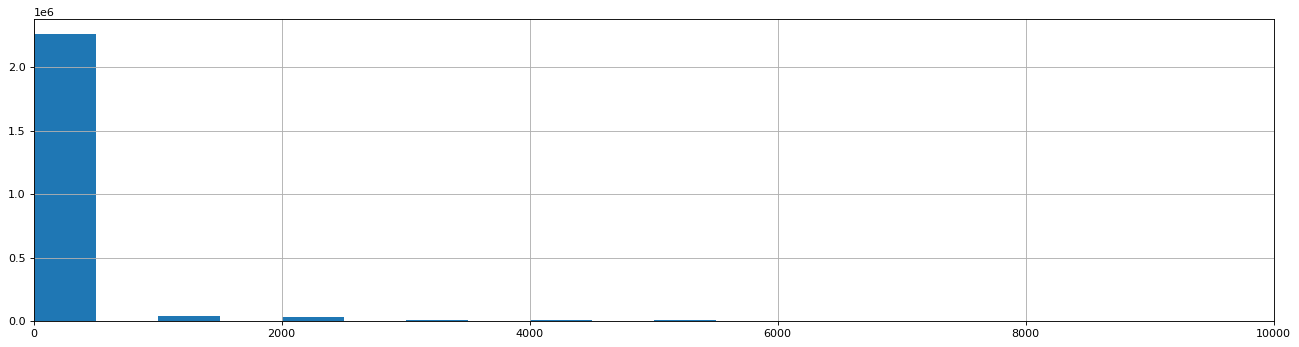

In [90]:
figure(figsize=(20, 5), dpi=80)
hist = his_servicios_df.PROPINA.hist(bins=100).set_xlim((0,10000))

In [7]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [21]:
m_1 = folium.Map(location=[3,-70], tiles='openstreetmap', zoom_start=6)
m_1

In [29]:
df_elements = his_servicios_df.sample(n=200)

m_2 = folium.Map(location=[3,-70], tiles='openstreetmap', zoom_start=6)

for idx, row in df_elements.iterrows():
    Marker([row['LATITUD'], row['LONGITUD']]).add_to(m_2)
    
m_2

In [43]:
import folium

base_map = folium.Map(location=[52.2297, 21.0122], control_scale=True, zoom_start=10)

points1 = [(52.228771, 21.003146),
           (52.238025, 21.050971),
           (52.255008, 21.036172),
           (52.252831, 21.051385),
           (52.219995, 20.965021)
          ]

train_group = folium.FeatureGroup(name="Trains").add_to(base_map)

for tuple_ in points1:

    icon=folium.Icon(color='white', icon='train', icon_color="red", prefix='fa')
    train_group.add_child(folium.Marker(tuple_, icon=icon))

points2 = [(52.239062, 21.131601),
           (52.204905, 21.168202),
           (52.181296, 20.987486),
           (52.206272, 20.914988),
           (52.254395, 21.224107)
          ]

cars_group = folium.FeatureGroup(name="Cars").add_to(base_map)

for tuple_ in points2:
    icon=folium.Icon(color='white', icon='car', icon_color="blue", prefix='fa')
    cars_group.add_child(folium.Marker(tuple_, icon=icon))

line_points = [(52.204905, 21.168202),
               (52.255008, 21.036172), 
               (52.219995, 20.965021), 
               (52.239062, 21.131601), 
               (52.254395, 21.224107)
              ]
lines_group = folium.FeatureGroup(name="Lines").add_to(base_map)
lines_group.add_child(folium.PolyLine(locations=line_points, weight=3,color = 'yellow'))

folium.LayerControl().add_to(base_map)

#base_map.save("example_map.html")
base_map